In [18]:
import numpy as np

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute, BasicAer
from qiskit.compiler import transpile
from qiskit.quantum_info.operators import Operator, Pauli
from qiskit.quantum_info import process_fidelity

from qiskit.extensions import RXGate, XGate, CXGate

from qiskit.ignis.mitigation.measurement import (complete_meas_cal,CompleteMeasFitter)

from qiskit import *
from math import pi
from qiskit.visualization import *

In [19]:
IBMQ.load_account()

ibmqfactory.load_account:WARNING:2022-07-03 17:39:38,360: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [20]:
provider = IBMQ.get_provider(hub='ibm-q-research', group='independent-12', project='main')

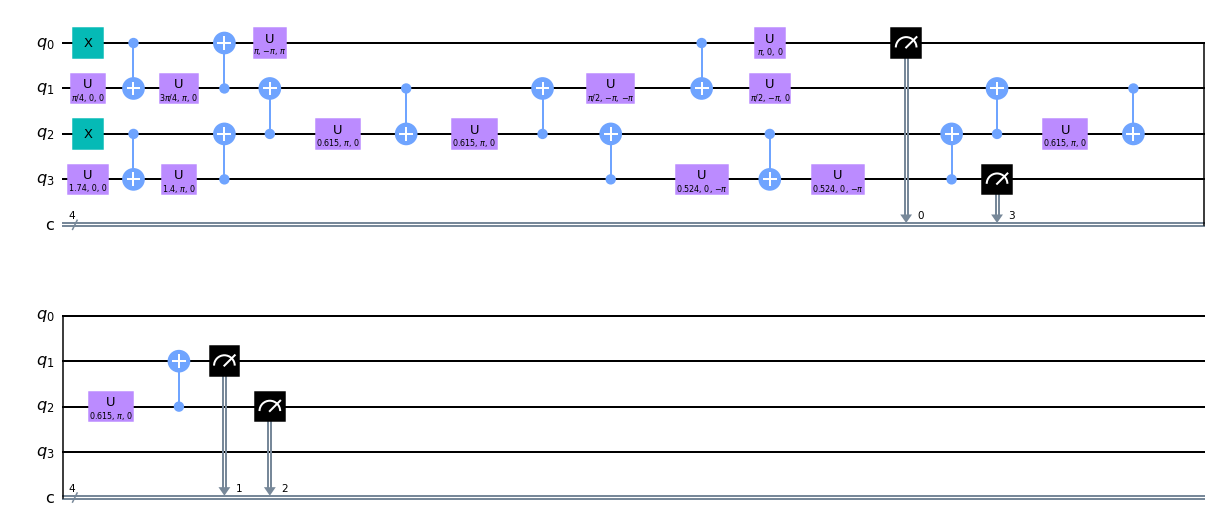

In [21]:
qc = QuantumCircuit(4,4)

qc.x(0)
qc.u(pi/4,0,0, 1)
qc.x(2)
qc.u(1.7407189,0,0,3)

qc.cx(0,1)
qc.cx(2,3)

qc.u(3*pi/4,pi,0,1)
qc.u(1.4008736,pi,0,3)

qc.cx(1,0)
qc.cx(3,2)
qc.cx(2,1)

qc.u(pi,-pi,pi,0)
qc.u(0.61548365,pi,0,2)
qc.cx(1,2)
qc.u(0.61548365,pi,0,2)
qc.cx(2,1)

qc.u(pi/2,-pi,-pi,1)
qc.cx(0,1)
qc.cx(3,2)
qc.u(0.52360105,0,-pi,3)
qc.cx(2,3)
qc.u(pi,0,0,0)
qc.u(0.52360105,0,-pi,3)
qc.u(pi/2,-pi,0,1)
qc.cx(3,2)
qc.cx(2,1)

qc.u(0.61548365,pi,0,2)
qc.cx(1,2)
qc.u(0.61548365,pi,0,2)
qc.cx(2,1)

qc.measure([0,1,2,3],[0,1,2,3])
qc.draw(output = "mpl")

In [22]:
backend = Aer.get_backend('qasm_simulator')

In [23]:
job = execute(qc,backend=backend, shots = 50000)
counts = job.result().get_counts()

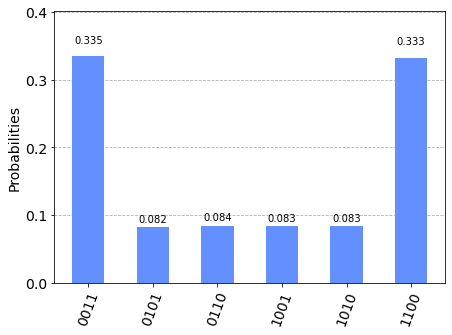

In [24]:
plot_histogram(counts)

In [25]:
dict_perfect = {
    "0011" : 1/3,
    "1100" : 1/3,
    "0101" : 1/12,
    "0110" : 1/12,
    "1001" : 1/12,
    "1010" : 1/12
}

In [26]:
def class_fid(dict1, dict2): 
    fid = 0 
    len1 = 0
    len2 = 0
    for key in dict1: 
        len1 += dict1[key]
    for key in dict2: 
        len2 += dict2[key]
        
    for key in dict1: 
        if key in dict2: 
            fid += (dict1[key]* dict2[key]/(len1*len2))**0.5
        else: 
            pass
    return fid

In [27]:
class_fid(dict_perfect, counts)

0.9999952938312364

In [34]:
qc = QuantumCircuit(4)

qc.x(0)
qc.u(pi/4,0,0, 1)
qc.x(2)
qc.u(1.7407189,0,0,3)

qc.cx(0,1)
qc.cx(2,3)

qc.u(3*pi/4,pi,0,1)
qc.u(1.4008736,pi,0,3)

qc.cx(1,0)
qc.cx(3,2)
qc.cx(2,1)

qc.u(pi,-pi,pi,0)
qc.u(0.61548365,pi,0,2)
qc.cx(1,2)
qc.u(0.61548365,pi,0,2)
qc.cx(2,1)

qc.u(pi/2,-pi,-pi,1)
qc.cx(0,1)
qc.cx(3,2)
qc.u(0.52360105,0,-pi,3)
qc.cx(2,3)
qc.u(pi,0,0,0)
qc.u(0.52360105,0,-pi,3)
qc.u(pi/2,-pi,0,1)
qc.cx(3,2)
qc.cx(2,1)

qc.u(0.61548365,pi,0,2)
qc.cx(1,2)
qc.u(0.61548365,pi,0,2)
qc.cx(2,1)

In [35]:
qc.draw(output = "mpl",fold = 10).savefig("../figures/CircuitA_v6.pdf", pad_inches = 0.1, bbox_inches='tight', format = "pdf", dpi = 2000)

In [36]:
backend=Aer.get_backend('statevector_simulator')

In [37]:
job = execute(qc,backend=backend)

vector = job.result().get_statevector()

In [38]:
vector

Statevector([-1.02388352e-17-1.14436054e-17j,
              9.19033994e-19-5.97830856e-18j,
              7.24009983e-17-1.44325375e-17j,
              5.77350308e-01-1.16842791e-16j,
             -5.11956649e-17+1.02054305e-17j,
             -2.88675652e-01+9.56599617e-17j,
             -2.88674671e-01-6.59292119e-18j,
              1.53191693e-17-3.90705885e-17j,
             -3.05097237e-17+1.86600669e-17j,
             -2.88674540e-01+4.03589658e-19j,
             -2.88668825e-01+6.92708765e-17j,
              5.21995985e-17+1.02054259e-17j,
              5.77353656e-01+2.12035285e-18j,
             -4.68791532e-17+1.44325310e-17j,
              8.29386051e-17-3.48432587e-17j,
              6.37894520e-18+3.78327024e-17j],
            dims=(2, 2, 2, 2))


In [39]:
text_file = open("../datas/CircuitA_Qasm.txt", "w")
text_file.write(qc.qasm())
text_file.close()